 
Build and study a simple model of oscillations arising from the interaction of excitatory and inhibitory populations of neurons. The firing rate of the excitatory neurons is rE, and that of the inhibitory neurons is RI:
 
 τE*dvE/dt =−vE +[MEEvE +MEIvI −γE]+
 
 τI*dvI/dt =−vI +[MIIvI +MIEvE −γI]+

[....]+ denotes thresholding such that negative values are put to zero. Set MEE = 1.25, MIE = 1, MII = 0, MEI = −1, γE = −10 Hz, γI = 10 Hz, τE = 10 ms, and vary the value of τI. The negative value of γE means that this parameter serves as a source of background activity (activity in the absence of excitatory input) rather than as a threshold. Show what happens for τI = 30 ms and for τI = 50 ms.

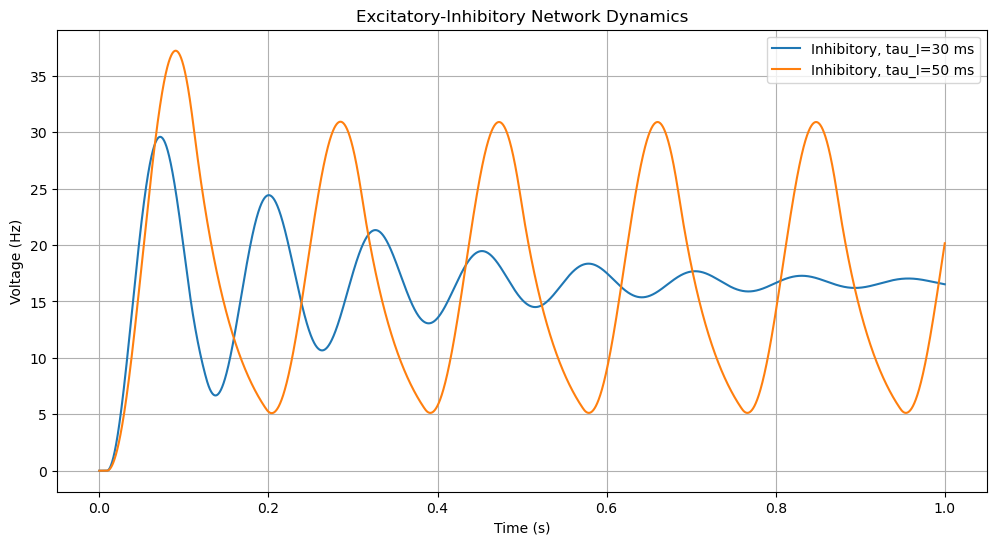

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters from the question
MEE = 1.25
MIE = 1
MII = 0
MEI = -1
gamma_E = -10  # Hz
gamma_I = 10   # Hz
tau_E = 10e-3  # 10 ms in seconds

# Simulation time
T = 1.0  # seconds
dt = 0.0001  # time step in seconds
time = np.arange(0, T, dt)

# Function to simulate the system
def simulate_network(tau_I):
    vE = np.zeros_like(time)
    vI = np.zeros_like(time)

    for i in range(1, len(time)):
        input_E = MEE * vE[i-1] + MEI * vI[i-1] - gamma_E  #For excitatory neurons
        input_I = MII * vI[i-1] + MIE * vE[i-1] - gamma_I  #For inhibitory neurons

        # Thresholding - avoid negative firing rates
        input_E = max(0, input_E)
        input_I = max(0, input_I)

        # Euler integration
        dvE = (-vE[i-1] + input_E) / tau_E * dt
        dvI = (-vI[i-1] + input_I) / tau_I * dt

        vE[i] = vE[i-1] + dvE
        vI[i] = vI[i-1] + dvI

    return vE, vI

# Run simulations for tau_I = 30 ms and 50 ms
tau_I_values = [30e-3, 50e-3]

plt.figure(figsize=(12, 6))

for tau_I in tau_I_values:
    vE, vI = simulate_network(tau_I)
    # plt.plot(time, vE, label=f'Excitatory, tau_I={tau_I*1000:.0f} ms')
    plt.plot(time, vI, label=f'Inhibitory, tau_I={tau_I*1000:.0f} ms')

plt.xlabel('Time (s)')
plt.ylabel('Voltage (Hz)')
plt.title('Excitatory-Inhibitory Network Dynamics')
plt.legend()
plt.grid(True)
plt.show()

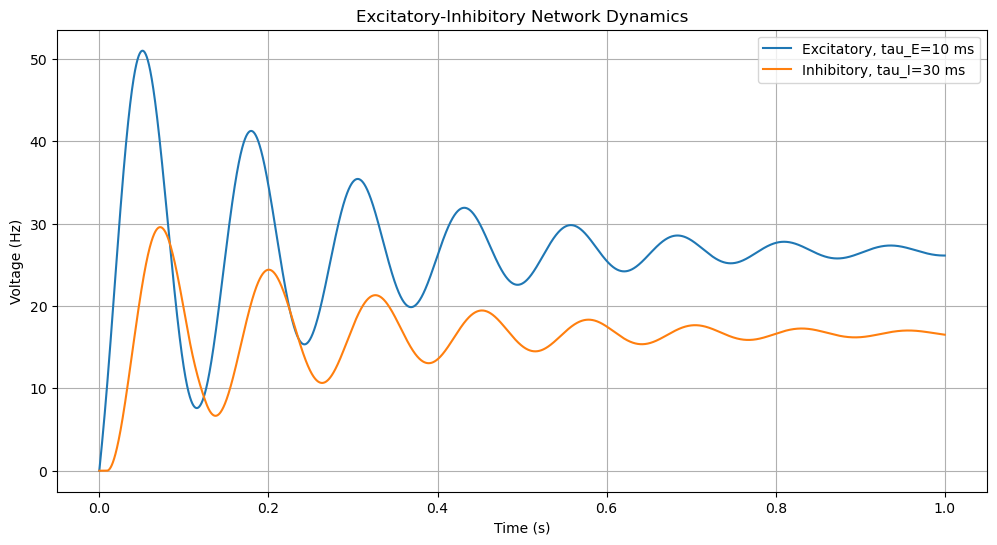

In [2]:
# Run simulations for tau_I = 30 ms and 50 ms
tau_I_values = [30e-3]
tau_E_values = [10e-3]

plt.figure(figsize=(12, 6))

for tau_I in tau_I_values:
    vE, vI = simulate_network(tau_I)
    plt.plot(time, vE, label=f'Excitatory, tau_E={tau_E*1000:.0f} ms')
    plt.plot(time, vI, label=f'Inhibitory, tau_I={tau_I*1000:.0f} ms')

plt.xlabel('Time (s)')
plt.ylabel('Voltage (Hz)')
plt.title('Excitatory-Inhibitory Network Dynamics')
plt.legend()
plt.grid(True)
plt.show()

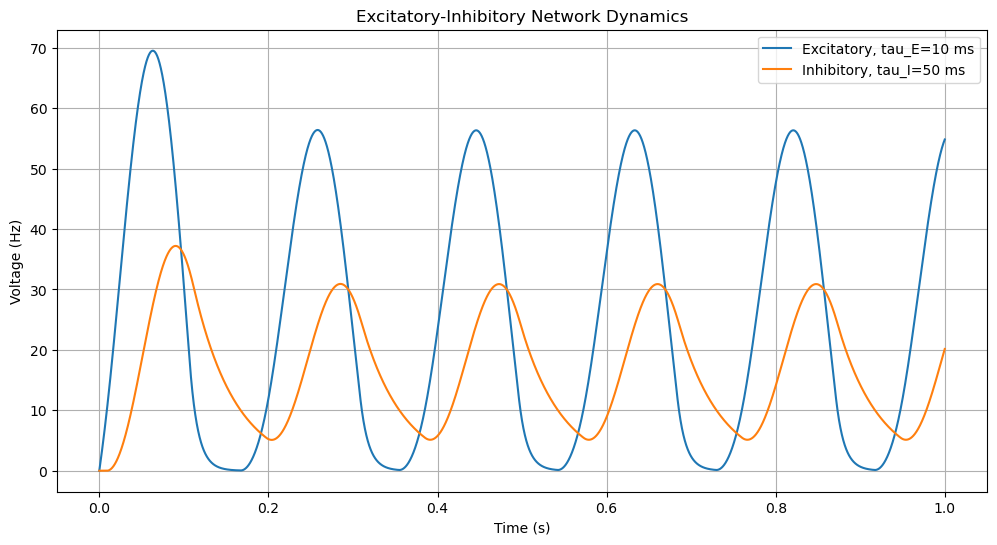

In [3]:
# Run simulations for tau_I = 30 ms and 50 ms
tau_I_values = [50e-3]
tau_E_values = [10e-3]

plt.figure(figsize=(12, 6))

for tau_I in tau_I_values:
    vE, vI = simulate_network(tau_I)
    plt.plot(time, vE, label=f'Excitatory, tau_E={tau_E*1000:.0f} ms')
    plt.plot(time, vI, label=f'Inhibitory, tau_I={tau_I*1000:.0f} ms')

plt.xlabel('Time (s)')
plt.ylabel('Voltage (Hz)')
plt.title('Excitatory-Inhibitory Network Dynamics')
plt.legend()
plt.grid(True)
plt.show()